In [1]:
import gpr
import forAustin as fa

import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('~/GitHub/custom-matplotlib/custom.mplstyle')

In [ ]:
ls -lh ../exposures/*npz

In [ ]:
bad_solns = [467, 473, 477, 478, 480, 483, 486, 488, 496, 497]
exposures = [exp for exp in np.arange(450, 490) if exp not in bad_solns]
GPlogr_list, GPxiE_list, GPxiB_list = [] , [], []
logr_list, xiE_list, xiB_list = [] , [], []
for nExposure in exposures:
    GP = gpr.GPR('dxdy', npz=f"../exposures/{nExposure}.npz")
    GP.savefits('../exposures')
    GP.loadfits(f'../exposures/GP{nExposure}.fits', f'../exposures/{nExposure}.fits')

    GPlogr, GPxiplus, GPximinus, GPxicross, GPjunk = fa.vcorr(GP.GPexposure)
    GPxiE, GPxiB = fa.xiEB(GPlogr, GPxiplus, GPximinus)
    GPlogr_list.append(GPlogr), GPxiE_list.append(GPxiE), GPxiB_list.append(GPxiB)
    
    logr, xiplus, ximinus, xicross, junk = fa.vcorr(GP.exposure)
    xiE, xiB = fa.xiEB(logr, xiplus, ximinus)
    logr_list.append(logr), xiE_list.append(xiE), xiB_list.append(xiB)

In [5]:
GPr = np.exp(np.mean(np.array(GPlogr_list), axis=0))
GPxiE = np.mean(np.array(GPxiE_list), axis=0)
GPxiB = np.mean(np.array(GPxiB_list), axis=0)

r = np.exp(np.mean(np.array(logr_list), axis=0))
xiE = np.mean(np.array(xiE_list), axis=0)
xiB = np.mean(np.array(xiB_list), axis=0)

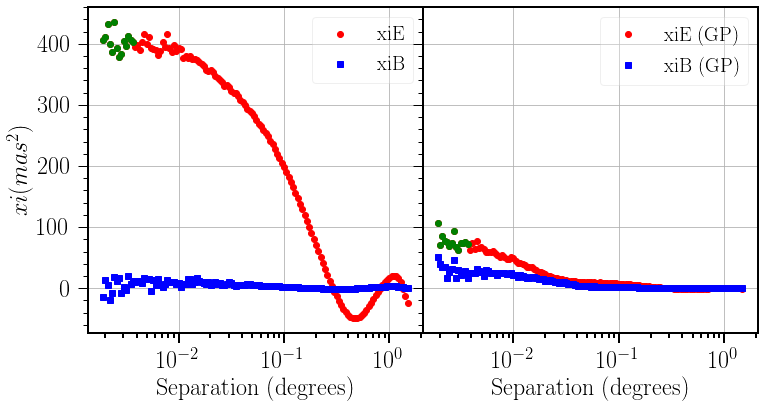

Average of first 20 (Real) xiE points: 403.650
Average of first 20 (Real – GP) xiE points: 76.812
Ratio of first 20 Real points to first 20 (Real – GP) points: 5.255


In [6]:
nAvg = 20

f, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))
plt.subplots_adjust(wspace=0)

# axes[0].set_title(f"Average (Real) Correlation for {len(exposures)} Exposures")
axes[0].semilogx(r, xiE, 'ro', label='xiE')
axes[0].semilogx(r, xiB, 'bs', label='xiB')
axes[0].semilogx(r[:nAvg], xiE[:nAvg], 'go')
axes[0].grid()
axes[0].set_xlabel('Separation (degrees)')
axes[0].set_ylabel('$xi (mas^2)$')
axes[0].legend(framealpha=0.3)

# axes[1].set_title(f"Average (Real – GP) Correlation for {len(exposures)} Exposures")
axes[1].semilogx(GPr, GPxiE, 'ro', label='xiE (GP)')
axes[1].semilogx(GPr, GPxiB, 'bs', label='xiB (GP)')
axes[1].semilogx(GPr[:nAvg], GPxiE[:nAvg], 'go')
axes[1].grid()
axes[1].set_xlabel('Separation (degrees)')
# axes[1].set_ylabel('xi (mas^2)')
axes[1].legend(framealpha=0.3)

plt.show()

first25 = np.nanmean(xiE[:nAvg])
GPfirst25 = np.nanmean(GPxiE[:nAvg])

print(f"Average of first {nAvg} (Real) xiE points: {first25:.3f}")
print(f"Average of first {nAvg} (Real – GP) xiE points: {GPfirst25:.3f}")
print(f"Ratio of first {nAvg} Real points to first {nAvg} (Real – GP) points: {first25 / GPfirst25:.3f}")

/home/fortino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: 'frac' option in 'arrowprops' is no longer supported; use 'headlength' to set the head length in points.
/home/fortino/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: 'frac' option in 'arrowprops' is no longer supported; use 'headlength' to set the head length in points.
  fig.canvas.print_figure(bytes_io, **kw)


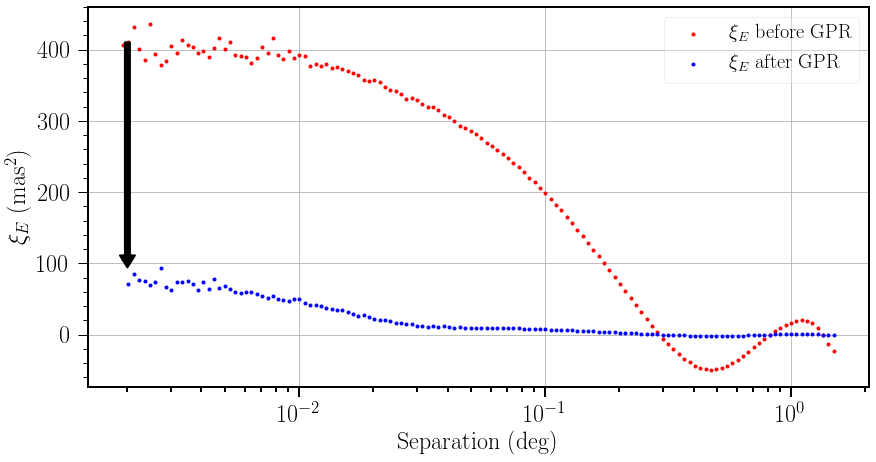

In [7]:
plt.figure(figsize=(14, 7))
# plt.title(f"Average E-Mode Correlation for {len(exposures)} Exposures", fontsize=20)
plt.semilogx(r, xiE, 'r.', label=r'$\xi_E$ before GPR')
# plt.semilogx(r[:nAvg], xiE[:nAvg], 'go')
plt.semilogx(GPr, GPxiE, 'b.', label=r'$\xi_E$ after GPR')
# plt.semilogx(GPr[:nAvg], GPxiE[:nAvg], 'gs')
plt.grid()
plt.xlabel('Separation (deg)')
plt.ylabel(r'$\xi_E$ (mas$^2$)')
plt.legend(framealpha=0.3)

plt.annotate('', xy=(0.002, 76.812), xycoords='data', xytext=(0, 250.026), textcoords='offset points',
            arrowprops=dict(width = 5.,
                            headwidth = 15.,
                            frac = 0.2,
                            shrink = 0.05,
                            linewidth = 2,
                            color = 'black'))


plt.savefig("correlation.pdf")
plt.show()


In [8]:
nExposure = 479
GP = gpr.GPR('dxdy', npz=f"../exposures/{nExposure}.npz")
GP.savefits('../exposures')
GP.loadfits(f'../exposures/GP{nExposure}.fits', f'../exposures/{nExposure}.fits')

RMSx, RMSy, noise: 17.567827265951077 18.1015056842785 1.3499674131511028


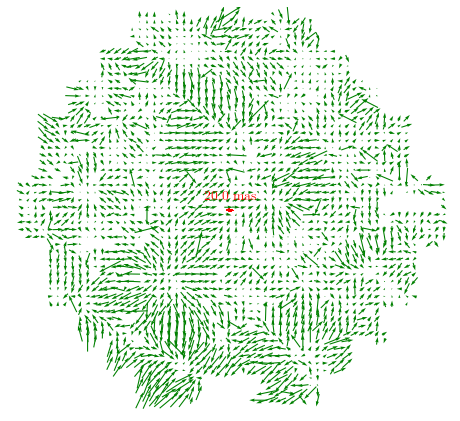

RMSx, RMSy, noise: 11.78834903601938 7.945078018813145 1.3499674131511028


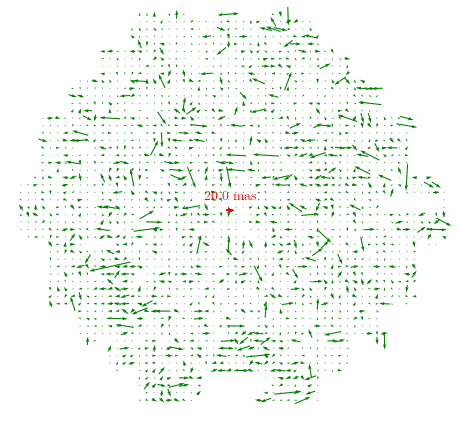

In [14]:
plt.figure(figsize=(8,8))
dx, dy, u, v, wt = fa.residInPixels(GP.exposure, binpix=512, scaleFudge=1)
plt.grid()
plt.axis('off')
# plt.savefig("quiver_before.pdf")
plt.savefig("quiver_before.png")
plt.show()

# plt.figure(figsize=(12,6))
# fa.ebPlot(dx, dy, u, v)
# plt.savefig("divcurl_before.pdf")
# plt.show()

plt.figure(figsize=(8,8))
GPdx, GPdy, GPu, GPv, GPwt = fa.residInPixels(GP.GPexposure, binpix=512, scaleFudge=1)
plt.grid()
plt.axis('off')
# plt.savefig("quiver_after.pdf")
plt.savefig("quiver_after.png")
plt.show()

# plt.figure(figsize=(12,6))
# fa.ebPlot(GPdx, GPdy, GPu, GPv)
# plt.savefig("divcurl_after.pdf")
# plt.show()

In [10]:
xiplus, cts = fa.vcorr2d(GP.exposure, rmax=0.3, bins=65)
GPxiplus, GPcts = fa.vcorr2d(GP.GPexposure, rmax=0.3, bins=65)

Length  7840
Length  7840


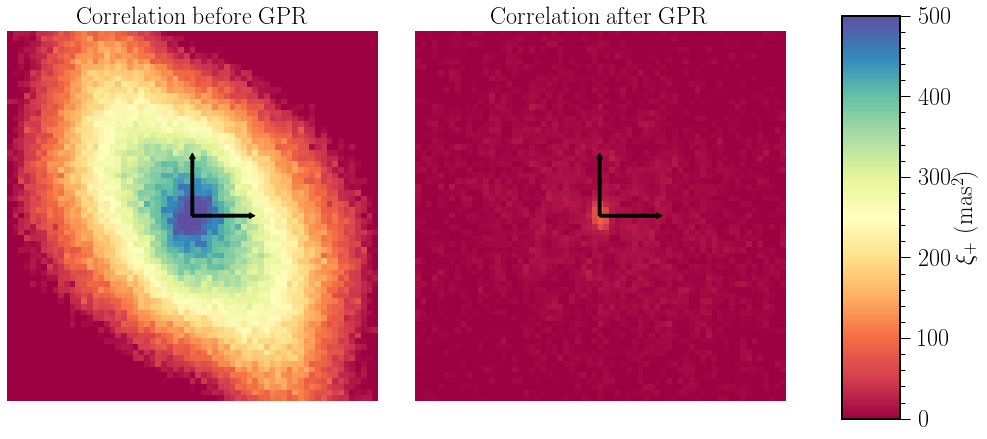

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
im = axes[0].imshow(xiplus, origin='lower', cmap='Spectral', interpolation='nearest', vmin=0, vmax=500)
im = axes[1].imshow(GPxiplus, origin='lower', cmap='Spectral', interpolation='nearest', vmin=0, vmax=500)

plt.subplots_adjust(wspace=0.1)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

axes[0].axis('off')
axes[1].axis('off')

axes[0].arrow(xiplus.shape[0]//2, xiplus.shape[0]//2, 10, 0, width=0.5, length_includes_head=False, head_width=1, head_length=1, color='black')
axes[0].arrow(xiplus.shape[0]//2, xiplus.shape[0]//2, 0, 10, width=0.5, length_includes_head=False, head_width=1, head_length=1, color='black')

axes[1].arrow(xiplus.shape[0]//2, xiplus.shape[0]//2, 10, 0, width=0.5, length_includes_head=False, head_width=1, head_length=1, color='black')
axes[1].arrow(xiplus.shape[0]//2, xiplus.shape[0]//2, 0, 10, width=0.5, length_includes_head=False, head_width=1, head_length=1, color='black')
cbar_ax.set_ylabel(r"$\xi_+\  \rm (mas^2)$")

axes[0].set_title("Correlation before GPR")
axes[1].set_title("Correlation after GPR")

plt.savefig("2d.pdf")
plt.show()